# Assignment 2 - DAT802
#### Studentnavn: Ketil Moland Olsen / Studentnummer: 597341
#### Studentnavn: Lill-Kristin Karlsen / Studentnummer: 597734 
#### Studentnavn: Nuno Trigo/ Studentnummer: 597152
#### Studentnavn: Vidar Hardeland / Studentnummer: 667453
#### Studentnavn: Stian Hegna / Studentnummer: 598789
--------------------------

Information about this file:
- This file was created with Colab.

# Introduction:




# Section 1 - Background and motivation (why)
Our group consists of members from various backgrounds and workplaces, and we wanted to find data to analyze that we could all relate to. Our choice of dataset is, in our opinion, highly relevant both in consideration to the ongoing COVID-19 epidemic and to our online education through the «Teknologi for forretningsutvikling» program, of which DAT802 is one of the parts. 

We are aware that some of the features in this dataset are not directly transferable to the infrastructure and situation in Norwegian schools and Universities, but some of the findings are still relevant, even to us. It is also very interesting to see what type of challenges countries with lesser developed infrastructure have endured, and how they have managed the shift to online education during the COVID-19 epidemic.

The dataset used for this assignment is «Students Adaptability Level in Online Education» and is a public Kaggle dataset. (06.05.22. https://www.kaggle.com/datasets/mdmahmudulhasansuzan/students-adaptability-level-in-online-education)
The student data presented in the dataset is collected through surveys from schools on different levels in Bangladesh in the period between December 10, 2020 to February 5, 2021. The aim is to see and predict the adaptation level of the students in online education, based on the variables specified below. (06.05.22, https://www.researchgate.net/profile/Md-Mahmudul-Suzan-2/publication/355891881_Students%27_Adaptability_Level_Prediction_in_Online_Education_using_Machine_Learning_Approaches/links/6183a0243c987366c3246357/Students-Adaptability-Level-Prediction-in-Online-Education-using-Machine-Learning-Approaches.pdf?origin=publication_detail )
The dataset consists of 1205 rows (samples) and 14 columns where the independent and dependent variables are as follows: 

'Gender', 'Age', 'Education Level', 'Institution Type', 'IT Student', 'Location', 'Load-shedding', 'Financial Condition', 'Internet Type', 'Network Type', 'Class Duration', 'Self Lms', 'Device', 'Adaptivity Level'. 

The dependent variable in the dataset is the Adaptability level of the student, where the probable values are ‘Low’, ‘Moderate’ or ‘High’. We will, through visualization and data exploration, try to show how the different variables in connection with this dependent variable and the independent variables in connection to each other.

The data format available for this dataset is a single .csv file, which we will convert to a Pandas dataframe. Since there is no missing or apparently invalid data in the dataset, we will invoke this on the dataset ourselves, to get a more realistic approach to how real-life datasets might be presented, and demonstrate methods to mitigate this.



# Section 2 - Data processing and analysis
We'll start by adding the libraries we'll use throughout this assignment. Next, we'll introduce some errors to the data set so we get some hands-on experience with data cleaning. Then, the next step will be to analyze and visualize the data, before concluding about our findings.

In [1]:
!pip install matplotlib --upgrade

Requirement already up-to-date: matplotlib in /Users/ketil/opt/anaconda3/lib/python3.8/site-packages (3.5.2)


In [2]:
# Import necessary libraries
import os # Not used yet
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import json
import copy

In [3]:
# Set the random seed to be able to replicate same results later
np.random.seed(69)
# import os
# print(os.getcwd())

In [4]:
# Verify that the random seed is set for numpy library
random_number = np.random.randint(0, 1000)
print('This number should be the same every time the whole Notebook is run "Run All":', random_number)

This number should be the same every time the whole Notebook is run "Run All": 54


## Creating Errors/Manipulating data
Since our dataset is considered "clean", without any obvious errors, we'll generate our own issues so we can introduce different methods to clean the data later.

First, we import the data and inspect it, to see what changes we would do to it.

#### We specify the location of the data

In [5]:
filename = 'students_adaptability_level_online_education.csv'
path = './dataset/'
filepath = path + filename

#### Next, we import the data and take a look at what it contains

In [6]:
# Import data from CSV to Pandas dataframe
data = pd.read_csv(filepath)

# Let's have a quick look at it
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


In [7]:
# Verify the shape (rows, columns) of the dataset
data.shape

(1205, 14)

In [8]:
# Check whether the dataset contains any null values or not
data.isnull().sum()

Gender                 0
Age                    0
Education Level        0
Institution Type       0
IT Student             0
Location               0
Load-shedding          0
Financial Condition    0
Internet Type          0
Network Type           0
Class Duration         0
Self Lms               0
Device                 0
Adaptivity Level       0
dtype: int64

#### Since the doesn't contain any null values, we introduce som random changes to the dataset. 

The code below will go through our Pandas DataFrame "```data```" and change values in random columns in random rows of our ```data``` for a max amount of ```max_errors```. The code will skip adding a new error, if the "cell" have already been changed.

In [9]:
# Define the minimum and maximum amount of errors to be created
min_errors = data.shape[0] / 10 # 10 percent of rows to be the minimum in the randint-interval.
add_percentage = 0.5 # Percentage of rows to be added to the maximum allowed errors in the randint-interval.
max_errors = np.random.randint(min_errors, (min_errors + data.shape[0] * add_percentage) if (min_errors + data.shape[0] * add_percentage) < (data.shape[0]) else data.shape[0])
print('Min amount of Errors: %d\nMax amounts of Errors: %d' % (min_errors, max_errors), '\n')

# Initializing a list to keep track of what cells have been changed, and stay in control of the amount of errors created.
list_changes = []

# A list with different error-types to choose from
list_errors = [np.nan, np.random.randint(801*10000, 802*200000), '<3', '', 'Jerry is a cool teacher'] # Add or remove in the list for other types or less.

# We count the number of times error creation was skipped...
count_skips = 0

# ...and keep track of how many of each error type we have added
dict_errors = {}

# For-loop to create errors in a random column and row in our dataset
for i in range(0, max_errors):
    print('Creating error #%d:' % len(list_changes))
    rng_row = np.random.randint(0, data.shape[0])
    print('Random row chosen: ', rng_row)
    rng_col = np.random.randint(0, len(data.columns))
    print('Random column chosen: ', rng_col)
    if (rng_row, rng_col) not in list_changes:
        list_changes.append((rng_row, rng_col))
        # Code under here to change/delete data within the dataset
        old_value = data.iloc[rng_row, rng_col]
        print('Old value in location [%d, %d]: ' % (rng_row, rng_col), old_value)
        data.iloc[rng_row, rng_col] = list_errors[np.random.randint(0, len(list_errors))]
        new_value = data.iloc[rng_row, rng_col]
        print('New value in location [%d, %d]: ' % (rng_row, rng_col), new_value, '\n')
        dict_errors[new_value] = dict_errors.get(new_value, 0) + 1
    else:
        count_skips += 1
        print('Cell have already been changes! Skipped!', '\n')

print('We have created %d errors in the dataset consisting of %d values.\n%0.2f%% of the dataset contains errors!\n%d error creations were skipped due to data already modified!' 
% (len(list_changes), data.size, len(list_changes) / data.size * 100, count_skips), '\n')

Min amount of Errors: 120
Max amounts of Errors: 323 

Creating error #0:
Random row chosen:  439
Random column chosen:  4
Old value in location [439, 4]:  No
New value in location [439, 4]:  151135099 

Creating error #1:
Random row chosen:  278
Random column chosen:  9
Old value in location [278, 9]:  4G
New value in location [278, 9]:  nan 

Creating error #2:
Random row chosen:  88
Random column chosen:  12
Old value in location [88, 12]:  Mobile
New value in location [88, 12]:  <3 

Creating error #3:
Random row chosen:  843
Random column chosen:  5
Old value in location [843, 5]:  Yes
New value in location [843, 5]:   

Creating error #4:
Random row chosen:  167
Random column chosen:  8
Old value in location [167, 8]:  Mobile Data
New value in location [167, 8]:  <3 

Creating error #5:
Random row chosen:  995
Random column chosen:  7
Old value in location [995, 7]:  Rich
New value in location [995, 7]:  nan 

Creating error #6:
Random row chosen:  760
Random column chosen:  9
Ol

Random row chosen:  753
Random column chosen:  4
Old value in location [753, 4]:  No
New value in location [753, 4]:  151135099 

Creating error #127:
Random row chosen:  524
Random column chosen:  4
Old value in location [524, 4]:  No
New value in location [524, 4]:  nan 

Creating error #128:
Random row chosen:  912
Random column chosen:  10
Old value in location [912, 10]:  1-3
New value in location [912, 10]:  151135099 

Creating error #129:
Random row chosen:  324
Random column chosen:  1
Old value in location [324, 1]:  16-20
New value in location [324, 1]:  Jerry is a cool teacher 

Creating error #130:
Random row chosen:  861
Random column chosen:  5
Old value in location [861, 5]:  No
New value in location [861, 5]:  nan 

Creating error #131:
Random row chosen:  190
Random column chosen:  11
Old value in location [190, 11]:  No
New value in location [190, 11]:  Jerry is a cool teacher 

Creating error #132:
Random row chosen:  907
Random column chosen:  8
Old value in locati

New value in location [307, 1]:   

Creating error #225:
Random row chosen:  494
Random column chosen:  8
Old value in location [494, 8]:  Mobile Data
New value in location [494, 8]:  Jerry is a cool teacher 

Creating error #226:
Random row chosen:  115
Random column chosen:  12
Old value in location [115, 12]:  Computer
New value in location [115, 12]:  nan 

Creating error #227:
Random row chosen:  985
Random column chosen:  3
Old value in location [985, 3]:  Non Government
New value in location [985, 3]:  Jerry is a cool teacher 

Creating error #228:
Random row chosen:  281
Random column chosen:  11
Old value in location [281, 11]:  No
New value in location [281, 11]:  <3 

Creating error #229:
Random row chosen:  552
Random column chosen:  3
Old value in location [552, 3]:  Non Government
New value in location [552, 3]:  151135099 

Creating error #230:
Random row chosen:  370
Random column chosen:  11
Old value in location [370, 11]:  No
New value in location [370, 11]:  nan 

C

In [10]:
for error in dict_errors:
    print('The error "%s" was added %d times to data in a random column and random row.' % (error, int(dict_errors.get(error))))

The error "151135099" was added 64 times to data in a random column and random row.
The error "nan" was added 77 times to data in a random column and random row.
The error "<3" was added 54 times to data in a random column and random row.
The error "" was added 66 times to data in a random column and random row.
The error "Jerry is a cool teacher" was added 59 times to data in a random column and random row.


Check the data after mock-up:

In [11]:
print(data)
print("Rows:",data.shape[0])
print("Columns:",data.shape[1])
print(data.columns)

     Gender    Age Education Level Institution Type IT Student Location  \
0       Boy  21-25      University   Non Government         No      Yes   
1      Girl  21-25      University   Non Government         No      Yes   
2      Girl  16-20         College       Government         No      Yes   
3      Girl  11-15          School   Non Government         No      Yes   
4      Girl  16-20          School   Non Government         No      Yes   
...     ...    ...             ...              ...        ...      ...   
1200   Girl  16-20         College   Non Government         No      Yes   
1201   Girl  16-20         College   Non Government         No       No   
1202    Boy  11-15          School   Non Government         No      Yes   
1203   Girl  16-20         College   Non Government         No       No   
1204   Girl  11-15          School   Non Government         No      Yes   

     Load-shedding      Financial Condition Internet Type Network Type  \
0              Low       

#### Let's create a two different bar plots.
- One to illustrate the amount of Errors compared with amounts of Rows and total amount of Values/Cells in dataset.
- The other to show what the amount of each error we have added.
- This is to easier check if the cleaning of data later on catches everything done to the dataset.

100


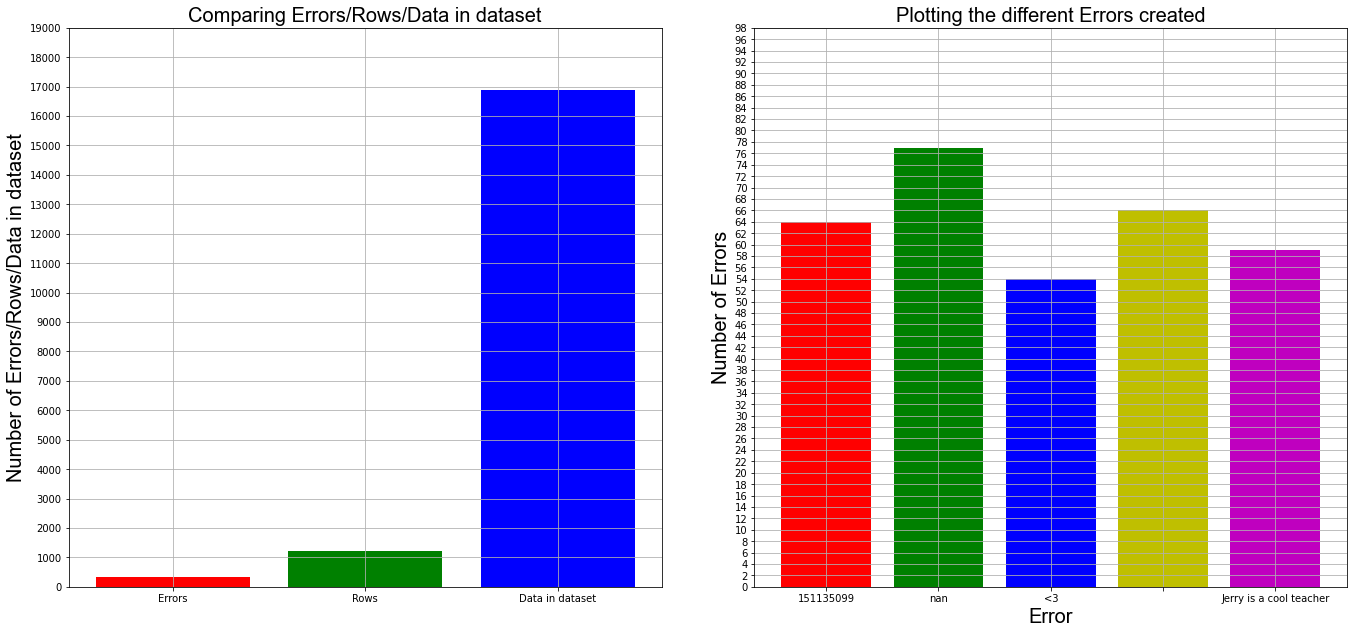

In [12]:
## Ploting some data
# Creating a figure object
fig1 = plt.figure(figsize=(20,10))

# Some adjustable constants for the plots
font_name = 'Arial'
font_size_title = 20
font_size_axis = 20

default_colors = ['r', 'g', 'b', 'y', 'm']



## Creating plot for amount of data that have been modified
# Placing subplot in figure object
ax1 = fig1.add_subplot(1, 2, 1)

# Defining the data to be plotted
x_names = ['Errors', 'Rows', 'Data in dataset']
y_values = [len(list_changes), data.shape[0], data.size]
colors = []
counter = 0
for key in x_names:
    colors.append(default_colors[counter]) # Creating list of cycling colors
    counter += 1
    if counter == len(default_colors):
        counter = 0

# Defining propeties to the plot
ax1.bar(x_names, y_values, align='center', color=colors)
ax1.set_title('Comparing ' + str(x_names[0]) + '/' + str(x_names[1]) + '/' + str(x_names[2]), fontname=font_name, fontsize=font_size_title)
ax1.set_xlabel('', fontname=font_name, fontsize=font_size_axis)
ax1.set_ylabel('Number of ' + str(x_names[0]) + '/' + str(x_names[1]) + '/' + str(x_names[2]), fontname=font_name, fontsize=font_size_axis)
max_y_value = round(data.size, -(len(str(data.size))-1)) # Rounding up to get nicer values for y-axis
ax1.set_yticks(np.arange(0, max_y_value, max_y_value / 20))
ax1.grid()



## Creating plot over the different errors that have been created
# Placing subplot in figure object
ax2 = fig1.add_subplot(1, 2, 2)

# Defining the data to be plotted
x_names = []
y_values = []
colors = []
counter = 0
for key in dict_errors:
    x_names.append(str(key))
    y_values.append(dict_errors.get(key))
    colors.append(default_colors[counter]) # Creating list of cycling colors
    counter += 1
    if counter == len(default_colors):
        counter = 0

# Defining propeties to the plot
ax2.bar(x_names, y_values, align='center', color=colors)
ax2.set_title('Plotting the different Errors created', fontname=font_name, fontsize=font_size_title)
ax2.set_xlabel('Error', fontname=font_name, fontsize=font_size_axis)
ax2.set_ylabel('Number of Errors', fontname=font_name, fontsize=font_size_axis)
max_y_value = round(max(y_values), -(len(str(max(y_values)))-0)) # Rounding up to get nicer values for y-axis
print(max_y_value)
ax2.set_yticks(np.arange(0, max_y_value, max_y_value / 50))
ax2.grid()



# Show plots
fig1.tight_layout(pad=5) # Create more space between the two plots
plt.show()

#### Taking a look at the first 20 rows in the data, too see how the error-creation looks

In [13]:
# Printing the first 20 rows of the data (after error creation)
data.head(20)

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Jerry is a cool teacher,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low
5,Boy,11-15,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,1-3,No,Mobile,Low
6,Boy,11-15,School,Non Government,No,Yes,Low,Mid,Wifi,4G,0,No,Mobile,Low
7,Boy,11-15,School,Non Government,No,Yes,Low,Mid,Wifi,151135099,1-3,No,Mobile,Moderate
8,Boy,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Low
9,Boy,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,3G,1-3,No,Mobile,Moderate


## Data cleaning and analysis

In [14]:
# Let's start the analysis by inspecting our dataset.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1199 non-null   object
 1   Age                  1204 non-null   object
 2   Education Level      1202 non-null   object
 3   Institution Type     1201 non-null   object
 4   IT Student           1200 non-null   object
 5   Location             1199 non-null   object
 6   Load-shedding        1198 non-null   object
 7   Financial Condition  1201 non-null   object
 8   Internet Type        1201 non-null   object
 9   Network Type         1200 non-null   object
 10  Class Duration       1200 non-null   object
 11  Self Lms             1196 non-null   object
 12  Device               1194 non-null   object
 13  Adaptivity Level     1198 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


In [15]:
# Next, time to find and get rid of any null values.
data.isnull().sum()

Gender                  6
Age                     1
Education Level         3
Institution Type        4
IT Student              5
Location                6
Load-shedding           7
Financial Condition     4
Internet Type           4
Network Type            5
Class Duration          5
Self Lms                9
Device                 11
Adaptivity Level        7
dtype: int64

In [16]:
data = data.dropna()

In [17]:
## check number of null after dropping 0 values:
print("Updated num of null:",data.isnull().sum(), sep="\n") 

Updated num of null:
Gender                 0
Age                    0
Education Level        0
Institution Type       0
IT Student             0
Location               0
Load-shedding          0
Financial Condition    0
Internet Type          0
Network Type           0
Class Duration         0
Self Lms               0
Device                 0
Adaptivity Level       0
dtype: int64


In [18]:
# Since the possible values of the different fields is supposed to be relatively low, we can inspect the unique values.
# In this dataset, there is only supposed to be two genders. Let's have a look

data['Gender'].unique()

array(['Boy', 'Girl', 151135099, '<3', 'Jerry is a cool teacher', ''],
      dtype=object)

In [19]:
# 'Boy' and 'Girl' are the only valid values here. Let's drop rows with other values.
index = data[(data['Gender'] != 'Boy') & (data['Gender'] != 'Girl') ].index
data.drop(index , inplace=True)
data['Gender'].value_counts()


Boy     616
Girl    500
Name: Gender, dtype: int64

In [20]:
# Now, let's have a look at the age column
data['Age'].unique()

array(['21-25', '16-20', '11-15', '26-30', '6-10', '1-5', 151135099, '<3',
       '', 'Jerry is a cool teacher'], dtype=object)

In [21]:
# Hm, it's not numbers, but ranges. Let's get rid of the values that are not legitimate by dropping the rows in question.
index = data[(data['Age'] == 151135099) | (data['Age'] == 129966710) | (data['Age'] == '<3') | (data['Age'] == '') | (data['Age'] == '<3') | (data['Age'] == 'Jerry is a cool teacher')].index
data.drop(index , inplace=True)
data['Age'].value_counts()

21-25    345
11-15    326
16-20    243
1-5       75
26-30     63
6-10      49
Name: Age, dtype: int64

In [22]:
# Next, let's fix the Education Level-column
data['Education Level'].unique()

array(['University', 'College', 'School', 'Jerry is a cool teacher',
       151135099, '<3', ''], dtype=object)

In [23]:
index = data[(data['Education Level'] != 'University') & (data['Education Level'] != 'School') & (data['Education Level'] != 'College')].index
data.drop(index , inplace=True)
data['Education Level'].value_counts()

School        489
University    415
College       183
Name: Education Level, dtype: int64

In [24]:
# We're getting the hang of this! Now, let's do the Institution Type
data['Institution Type'].unique()

array(['Non Government', 'Government', 'Jerry is a cool teacher',
       151135099, '<3', ''], dtype=object)

In [25]:
index = data[(data['Institution Type'] != 'Government') & (data['Institution Type'] != 'Non Government') ].index
data.drop(index , inplace=True)
data['Institution Type'].value_counts()

Non Government    734
Government        334
Name: Institution Type, dtype: int64

In [26]:
# Next up: IT Student
data['IT Student'].unique()

array(['No', 151135099, 'Yes', '<3', '', 'Jerry is a cool teacher'],
      dtype=object)

In [27]:
index = data[(data['IT Student'] != 'Yes') & (data['IT Student'] != 'No') ].index
data.drop(index , inplace=True)
data['IT Student'].value_counts()

No     773
Yes    275
Name: IT Student, dtype: int64

In [28]:
# Let's do Location
data['Location'].value_counts()

Yes                        804
No                         227
151135099                    6
                             6
Jerry is a cool teacher      3
<3                           2
Name: Location, dtype: int64

In [29]:
# Here, we set the location to 'unknown' / 'No' for all the records with garbage data.

In [30]:
data.loc[(data['Location'] != 'Yes') & (data['Location'] != 'No'), 'Location'] = 'No'
data['Location'].value_counts()


Yes    804
No     244
Name: Location, dtype: int64

In [31]:
# Let's jump to the Load-shedding column
data['Load-shedding'].value_counts()


Low                        853
High                       177
Jerry is a cool teacher      6
151135099                    5
                             5
<3                           2
Name: Load-shedding, dtype: int64

In [32]:
# Low and High seems to be the only legitimate values. Let's drop the rest.

index = data[(data['Load-shedding'] != 'Low') & (data['Load-shedding'] != 'High') ].index
data.drop(index , inplace=True)
data['Load-shedding'].value_counts()

Low     853
High    177
Name: Load-shedding, dtype: int64

In [33]:
# Let's have a peek at the financial condition:

data['Financial Condition'].value_counts()

Mid                        732
Poor                       208
Rich                        74
<3                           5
151135099                    4
Jerry is a cool teacher      4
                             3
Name: Financial Condition, dtype: int64

In [34]:
# Right, Mid, Poor Right are the only valid values. Let's clean the rest.

index = data[(data['Financial Condition'] != 'Rich') & (data['Financial Condition'] != 'Mid') & (data['Financial Condition'] != 'Poor') ].index
data.drop(index , inplace=True)
data['Financial Condition'].value_counts()

Mid     732
Poor    208
Rich     74
Name: Financial Condition, dtype: int64

In [35]:
# One more down! Now, let's fix the Internet Type column.
data['Internet Type'].value_counts()

Mobile Data                575
Wifi                       424
Jerry is a cool teacher      5
<3                           4
151135099                    3
                             3
Name: Internet Type, dtype: int64

In [36]:
# That's one more boolean value. Let's get rid of everything else than Mobile Data and Wifi.
index = data[(data['Internet Type'] != 'Mobile Data') & (data['Internet Type'] != 'Wifi') ].index
data.drop(index , inplace=True)
data['Internet Type'].value_counts()

Mobile Data    575
Wifi           424
Name: Internet Type, dtype: int64

In [37]:
# And let's fix the network type as well.
data['Network Type'].value_counts()


4G                         619
3G                         341
2G                          18
<3                           6
Jerry is a cool teacher      6
                             5
151135099                    4
Name: Network Type, dtype: int64

In [38]:
# Three categories here. Let's get rid of the rest.

index = data[(data['Network Type'] != '4G') & (data['Network Type'] != '3G') & (data['Network Type'] != '2G') ].index
data.drop(index , inplace=True)
data['Network Type'].value_counts()

4G    619
3G    341
2G     18
Name: Network Type, dtype: int64

In [39]:
# Let's head over to the Class Duration column. Let's see what we find.
data['Class Duration'].value_counts()

1-3                        673
3-6                        168
0                          128
151135099                    3
                             3
Jerry is a cool teacher      2
<3                           1
Name: Class Duration, dtype: int64

In [40]:
# 0 stands for other / unsure in this case. Let's map our rows with garabage values to that entity.
data.loc[(data['Class Duration'] != '1-3') & (data['Class Duration'] != '3-6'), 'Class Duration'] = '0'
data['Class Duration'].value_counts()

1-3    673
3-6    168
0      137
Name: Class Duration, dtype: int64

In [41]:
# Now, it's all about the Self Lms column. Let's have a look:
data['Self Lms'].value_counts()

No                         797
Yes                        165
                             6
Jerry is a cool teacher      5
151135099                    3
<3                           2
Name: Self Lms, dtype: int64

In [42]:
# Yet another boolean value. Let's get rid of the errors.
index = data[(data['Self Lms'] != 'Yes') & (data['Self Lms'] != 'No') ].index
data.drop(index , inplace=True)
data['Self Lms'].value_counts()


No     797
Yes    165
Name: Self Lms, dtype: int64

In [43]:
# Next up: Device. It's going to be exciting to see what comes first – mobile, tablet, or computer. :)
data['Device'].value_counts()


Mobile                     801
Computer                   125
Tab                         23
                             8
151135099                    2
<3                           2
Jerry is a cool teacher      1
Name: Device, dtype: int64

In [44]:
# Wow, that's a clear winner! The other platforms don't even come close. Now, it's cleaning time.
index = data[(data['Device'] != 'Mobile') & (data['Device'] != 'Computer') & (data['Device'] != 'Tab') ].index
data.drop(index , inplace=True)
data['Device'].value_counts()

Mobile      801
Computer    125
Tab          23
Name: Device, dtype: int64

In [45]:
# It's time for the final one. Drumroll. And it's Adaptivity Level.

data['Adaptivity Level'].value_counts()
index = data[(data['Adaptivity Level'] != 'Moderate') & (data['Adaptivity Level'] != 'Low') & (data['Adaptivity Level'] != 'High') ].index
data.drop(index , inplace=True)
data['Adaptivity Level'].value_counts()

Moderate    474
Low         384
High         80
Name: Adaptivity Level, dtype: int64

# **Other cleaning methods.**

*An alternative way to clean the data would be to inspect all the columns for their unique values at once using this regular expression :*

**[data[col_name].unique() for col_name in data.columns]**

*This would list the unique values for all the columns in an array for each column, and with some knowledge about the dataset, one would be able to identify errors in the dataset. This might not be suitable for very large datasets, but in this spesific case, a valid option.*

*Furthermore, instead of dropping the data with errors in it, one could first set the errordata to np.nan values after identifying it, using a for loop and replace function:*

**for value in data:**
    **data.replace([64765036, 'Jerry is a cool teacher','', '<3'], np.nan,** **inplace = True)**

*This would provide another option, if one wanted to fill the np.nan values with last valid value instead of dropping them, using this numpy function:*

**data.fillna(method='ffill', inplace=True)** 

*This could also be done i reverse mode, choosing the value in reverse order to fill by changing the method to 'bfill'.*

*NB! If this is to be done, we need to sort the data on relevant Features like "Gender" and "Age", to prevent a kid in the age span 1-5 to be listed as a University student!*

## Transforming categorical data/types to numerical data

To be able to do different analyses/visualizations of the data, we need to transform the different types in categories/columns to numerical values.
For each column, we change the types to numerical values from 0 to n, for n types.

In [46]:
## The following code will go through the whole data set, and change each type to numerical values.
## The code will also store the changes done in a dictionary "dict_assigned_data".

# Initialising a empty dictionary to store changes done
dict_assigned_data = {}
# Looping through each coloumn in our data
for column in data:
    # print('Column in data: ', column)
    dict_assigned_data[column] = {}
    counter = 0 # Initialising a counter to assign a value to the different keys/types in the data column.
    dict_column = {} # Initialising a dictionary to temporary hold the types as keys and numerical values from 1 to n.
    # Creating a sorted list holding each type from the current column
    list_types = list(data[column].unique())
    # print(list_types)
    if '-' in list_types[0]:
        list_types_sorted = sorted(list_types, key=lambda x: int(x.split('-')[0])) # Used to sort ranges for instance 1-5, and 5-10 etc. Will sort on number before '-'.
    else:
        list_types_sorted = sorted(list_types, key=lambda x: x.split()[0])
    # print('column', column, list_types_sorted, '\n')
    # Looping through each type in the current column
    for type in list_types_sorted:
        if type not in dict_assigned_data:
            # print('Type found in %s:' % column, type)
            dict_column[type] = int(counter)
            counter += 1
    if len(dict_column) > 0:
        dict_assigned_data[column] = dict_column
print('Dictionary that holds the changes we will do to each category`s types', '\n', json.dumps(dict_assigned_data, indent=10))


Dictionary that holds the changes we will do to each category`s types 
 {
          "Gender": {
                    "Boy": 0,
                    "Girl": 1
          },
          "Age": {
                    "1-5": 0,
                    "6-10": 1,
                    "11-15": 2,
                    "16-20": 3,
                    "21-25": 4,
                    "26-30": 5
          },
          "Education Level": {
                    "College": 0,
                    "School": 1,
                    "University": 2
          },
          "Institution Type": {
                    "Government": 0,
                    "Non Government": 1
          },
          "IT Student": {
                    "No": 0,
                    "Yes": 1
          },
          "Location": {
                    "No": 0,
                    "Yes": 1
          },
          "Load-shedding": {
                    "High": 0,
                    "Low": 1
          },
          "Financial Condition": {
             

In [47]:
# Manually changing some values to make "low" = 0, "moderate" = 1 and "high" = 2 etc
dict_assigned_data['Education Level']['School'] = 0
dict_assigned_data['Education Level']['College'] = 1
dict_assigned_data['Load-shedding']['Low'] = 0
dict_assigned_data['Load-shedding']['High'] = 1
dict_assigned_data['Financial Condition']['Poor'] = 0
dict_assigned_data['Financial Condition']['Mid'] = 1
dict_assigned_data['Device']['Mobile'] = 0
dict_assigned_data['Device']['Tab'] = 1
dict_assigned_data['Device']['Computer'] = 2
dict_assigned_data['Adaptivity Level']['Low'] = 0
dict_assigned_data['Adaptivity Level']['Moderate'] = 1
dict_assigned_data['Adaptivity Level']['High'] = 2
print('Updated Dictionary that holds the changes we will do to each category`s types', '\n', json.dumps(dict_assigned_data, indent=10))

Updated Dictionary that holds the changes we will do to each category`s types 
 {
          "Gender": {
                    "Boy": 0,
                    "Girl": 1
          },
          "Age": {
                    "1-5": 0,
                    "6-10": 1,
                    "11-15": 2,
                    "16-20": 3,
                    "21-25": 4,
                    "26-30": 5
          },
          "Education Level": {
                    "College": 1,
                    "School": 0,
                    "University": 2
          },
          "Institution Type": {
                    "Government": 0,
                    "Non Government": 1
          },
          "IT Student": {
                    "No": 0,
                    "Yes": 1
          },
          "Location": {
                    "No": 0,
                    "Yes": 1
          },
          "Load-shedding": {
                    "High": 1,
                    "Low": 0
          },
          "Financial Condition": {
     

In [48]:
## Creating a copy of our cleaned data, to transform it to numerical values
data_num = copy.copy(data)
# Looping through the categories to assign numerical values to each type in each category/column
for category in dict_assigned_data:
    replace = list(dict_assigned_data[category].keys())
    values = list(dict_assigned_data[category].values())
    print('In category %s we replace the types %s with the values %s ' % (category, replace, values), '\n')
    data_num.replace(to_replace = replace, value = values, inplace=True)
# Due to the use of np.nan, arrays of number might become floats. To further reduce datasize/processing power needed, we transform all numbers to int
data_num = data_num[list(dict_assigned_data.keys())].astype(int)
# Showing the 20 first rows in our data_num DataFrame
data_num.head(20)

In category Gender we replace the types ['Boy', 'Girl'] with the values [0, 1]  

In category Age we replace the types ['1-5', '6-10', '11-15', '16-20', '21-25', '26-30'] with the values [0, 1, 2, 3, 4, 5]  

In category Education Level we replace the types ['College', 'School', 'University'] with the values [1, 0, 2]  

In category Institution Type we replace the types ['Government', 'Non Government'] with the values [0, 1]  

In category IT Student we replace the types ['No', 'Yes'] with the values [0, 1]  

In category Location we replace the types ['No', 'Yes'] with the values [0, 1]  

In category Load-shedding we replace the types ['High', 'Low'] with the values [1, 0]  

In category Financial Condition we replace the types ['Mid', 'Poor', 'Rich'] with the values [1, 0, 2]  

In category Internet Type we replace the types ['Mobile Data', 'Wifi'] with the values [0, 1]  

In category Network Type we replace the types ['2G', '3G', '4G'] with the values [0, 1, 2]  

In category Clas

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,0,4,2,1,0,1,0,1,1,2,2,0,1,1
3,1,2,0,1,0,1,0,1,0,2,1,0,0,1
4,1,3,0,1,0,1,0,0,0,1,0,0,0,0
5,0,2,0,1,0,1,0,0,0,1,1,0,0,0
6,0,2,0,1,0,1,0,1,1,2,0,0,0,0
8,0,3,1,0,0,1,0,1,1,2,1,0,0,0
9,0,2,0,1,0,1,0,1,0,1,1,0,0,1
10,1,3,2,0,0,1,0,1,1,2,1,0,0,0
11,1,3,1,1,0,1,0,1,1,2,1,0,0,0
13,1,3,1,1,0,0,0,1,1,2,1,0,0,0


In [49]:
# Next, let's transform the labeled data to numerical values using OrdinalEncoder
#This is an alternative way to transform the categorical data to numerical values. We use OrdinalEncoder in this case, due to fact that the 
#order of how the data is labeled matters, and OrdinalEncoder supports this.
#from sklearn.preprocessing import OrdinalEncoder

#categorical_cols = ["Gender","Age", "Education Level","Institution Type", "IT Student","Location","Load-shedding","Financial Condition","Internet Type","Network Type","Class Duration", "Self Lms", "Device", "Adaptivity Level"]

#gen = ['Boy','Girl']
#age = ["1-5","6-10", "11-15", "16-20", "21-25", "26-30"]
#edu = ['School','College','University']
#inst = ['Non Government', 'Government']
#it = ['No', 'Yes']
#loc = ['No', 'Yes']
#load  = ['Low', 'High']
#fin = ['Poor', 'Mid', 'Rich']
#internet = ['Mobile Data', 'Wifi']
#net = ['2G','3G', '4G']
#class_dur = ['0','1-3','3-6']                                          
#self = ['No', 'Yes']
#dev = ['Mobile', 'Tab', 'Computer']                                          
#adap = ['Low','Moderate', 'High']

#enc = OrdinalEncoder(categories=[gen, age, edu,inst, it, loc, load, fin, internet, net, class_dur, self, dev, adap])
                                                                                                                     

#data_cat = enc.fit_transform(data.loc[:,["Gender","Age", "Education Level","Institution Type", "IT Student","Location","Load-shedding","Financial Condition","Internet Type","Network Type","Class Duration", "Self Lms", "Device", "Adaptivity Level"]])
     


#data_enc = pd.DataFrame(data_cat, columns = categorical_cols)





In [50]:
# With the cleaning done, let's see what have have now.
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 938 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               938 non-null    object
 1   Age                  938 non-null    object
 2   Education Level      938 non-null    object
 3   Institution Type     938 non-null    object
 4   IT Student           938 non-null    object
 5   Location             938 non-null    object
 6   Load-shedding        938 non-null    object
 7   Financial Condition  938 non-null    object
 8   Internet Type        938 non-null    object
 9   Network Type         938 non-null    object
 10  Class Duration       938 non-null    object
 11  Self Lms             938 non-null    object
 12  Device               938 non-null    object
 13  Adaptivity Level     938 non-null    object
dtypes: object(14)
memory usage: 109.9+ KB


In [51]:
data.head(20)

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low
5,Boy,11-15,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,1-3,No,Mobile,Low
6,Boy,11-15,School,Non Government,No,Yes,Low,Mid,Wifi,4G,0,No,Mobile,Low
8,Boy,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Low
9,Boy,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,3G,1-3,No,Mobile,Moderate
10,Girl,16-20,University,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Low
11,Girl,16-20,College,Non Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Low
13,Girl,16-20,College,Non Government,No,No,Low,Mid,Wifi,4G,1-3,No,Mobile,Low


In [52]:
# # We will now make a heatmap to find potential correlation between features
# # But first we need to create a 2D array which defines the data to color code
# numerical_data = data.loc[:, ['Gender_Cat','Age_Cat','Education Level_Cat','Institution Type_Cat','IT Student_Cat','Location_Cat','Load-shedding_Cat','Financial Condition_Cat','Internet Type_Cat','Network Type_Cat','Class Duration_Cat','Self Lms_Cat','Device_Cat','Adaptivity Level_Cat']]

In [53]:
# #Then we are ready to create the heatmap.
# plt.figure(figsize=(16, 6))
# heatmap = sns.heatmap(numerical_data.corr(), annot=True, cmap='summer')
# heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

<AxesSubplot:>

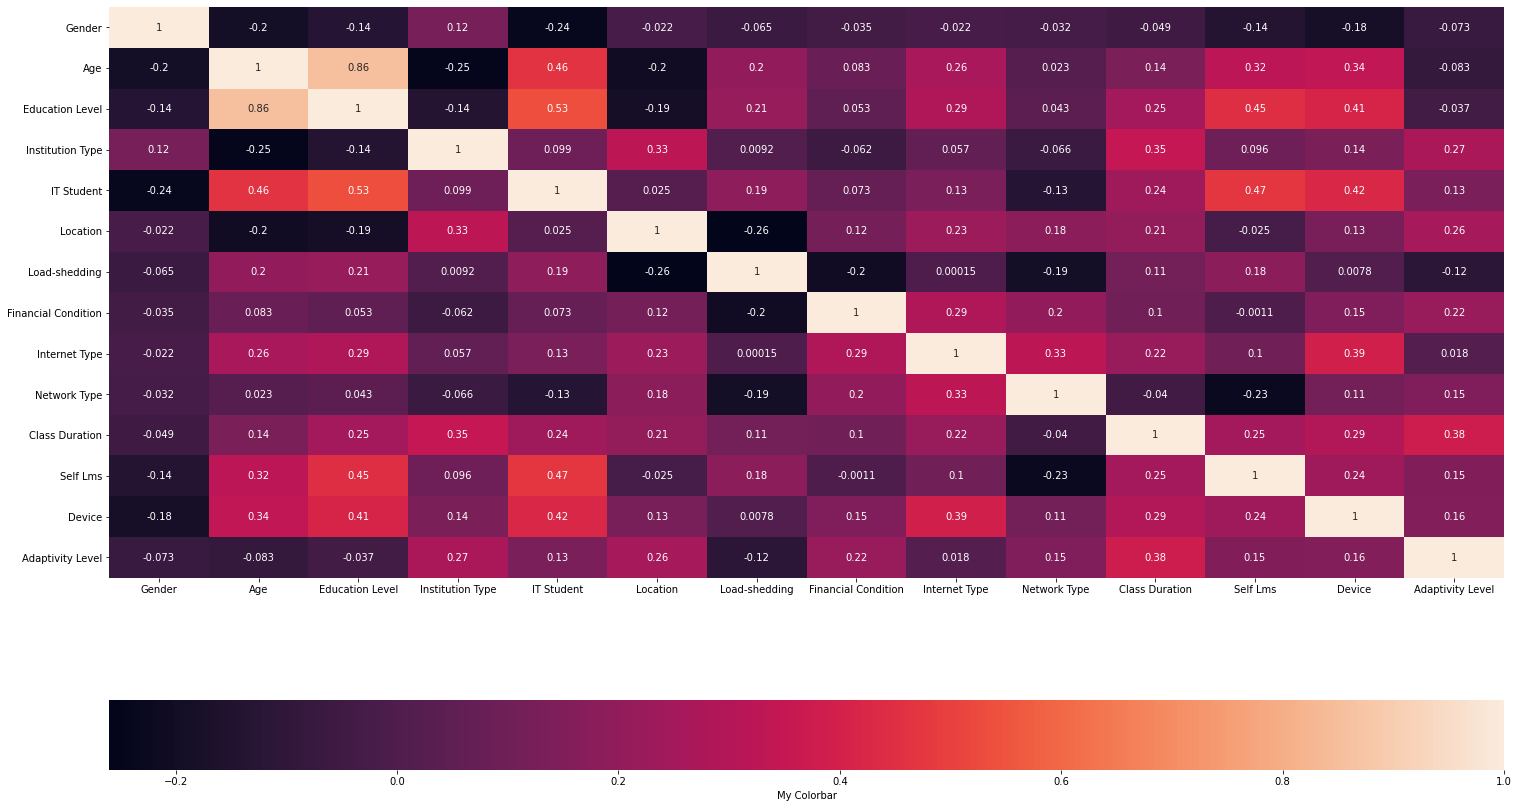

In [54]:
# Lets take a look to see if some data have high coorelations between them
fig = plt.figure(figsize=(25,15))
covMatrix = pd.DataFrame.corr(data_num)
sns.heatmap(covMatrix, annot=True, cbar_kws={'label': 'My Colorbar', 'orientation': 'horizontal'})

In [55]:
corr_matrix = data_num.corr() #Showing actual correlation values between features and target.
print(corr_matrix["Adaptivity Level"].sort_values(ascending=False))

Adaptivity Level       1.000000
Class Duration         0.378604
Institution Type       0.274769
Location               0.260864
Financial Condition    0.217870
Device                 0.155676
Self Lms               0.152755
Network Type           0.145501
IT Student             0.132253
Internet Type          0.018240
Education Level       -0.037135
Gender                -0.072580
Age                   -0.083266
Load-shedding         -0.115040
Name: Adaptivity Level, dtype: float64


In [56]:
## We will take compare Age to Education Level to see if this makes sense, and makes the data (atleast for these two) look right.

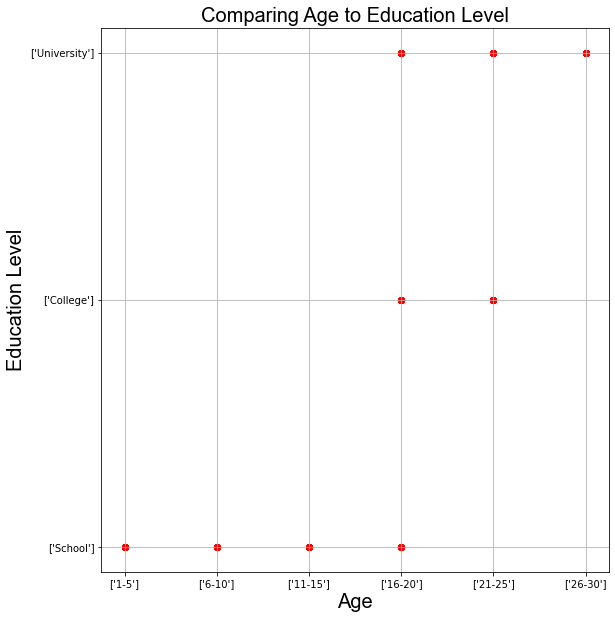

In [57]:
## Preparing some data before more plotting
# Creating a figure object
fig1 = plt.figure(figsize=(20,10))

# Some adjustable constants for the plots
font_name = 'Arial'
font_size_title = 20
font_size_axis = 20

default_colors = ['r', 'g', 'b', 'y', 'm']

## Creating plot for amount of data that have been modified
# Placing subplot in figure objectp
ax1 = fig1.add_subplot(1, 2, 1)

# Defining a new DataFrame with data for plotting
x_str = 'Age'
y_str = 'Education Level'
num = ' Numerical Value'
plot_data = [data[x_str], data_num[x_str], data[y_str], data_num[y_str]]
plot_headers = [x_str, x_str + num, y_str, y_str + num]
plot_df = pd.concat(plot_data, axis=1, keys=plot_headers)

# Assigning variables to the different columns
# x = plot_df[x_str]
x_num = plot_df[x_str + num]
# y = plot_df[y_str]
y_num = plot_df[y_str + num]
# Defining propeties to the plot
ax1.scatter(x_num, y_num, color=default_colors[0])
ax1.set_xticks(np.arange(0, max(x_num) + 1, 1)) # defining the interval between the x-ticks and number of ticks
ax1.set_yticks(np.arange(0, max(y_num) + 1, 1)) # defining the interval between the y-ticks and number of ticks
counter = 0
x_text = []
for i in range(len(plot_df[x_str].unique())): # For-loop to create list of x-labels
  x_text.append(plot_df[plot_df[x_str + num] == counter][x_str].unique())
  counter += 1
ax1.set_xticklabels(x_text) # defining the x-ticker label

counter = 0
y_text = []
for i in range(len(plot_df[y_str].unique())): # For-loop to create list of y-labels
  y_text.append(plot_df[plot_df[y_str + num] == counter][y_str].unique())
  counter += 1
# print(y_text)
ax1.set_yticklabels(y_text) # defining the y-ticker label

ax1.set_title('Comparing ' + str(x_str) + ' to ' + str(y_str), fontname=font_name, fontsize=font_size_title)
ax1.set_xlabel(x_str, fontname=font_name, fontsize=font_size_axis)
ax1.set_ylabel(y_str, fontname=font_name, fontsize=font_size_axis)
ax1.grid()

In [58]:
# ## Preparing some data before more plotting
# # Creating a figure object
# fig1 = plt.figure(figsize=(20,10))

# # Some adjustable constants for the plots
# font_name = 'Arial'
# font_size_title = 20
# font_size_axis = 20

# default_colors = ['r', 'g', 'b', 'y', 'm']

# ## Creating plot for amount of data that have been modified
# # Placing subplot in figure objectp
# ax1 = fig1.add_subplot(1, 2, 1)

# # Defining a new DataFrame with data for plotting
# x_str = 'Age'
# # x_str_cat = x_str + '_Cat'
# x_str_cat = x_str
# y_str = 'Education Level'
# # y_str_cat = y_str + '_Cat'
# y_str_cat = y_str
# num = ' Numerical Value'
# plot_data = [data[x_str], data[x_str_cat], data[y_str], data[y_str_cat]]
# plot_headers = [x_str, x_str_cat, y_str, y_str_cat]
# plot_df = pd.concat(plot_data, axis=1, keys=plot_headers)
# # print(plot_df[(plot_df['Age'] == '1-5') & (plot_df['Education Level_Cat'] !=0)].head(40))
# # Assigning variables to the different columns
# x_num = plot_df[x_str_cat]
# y_num = plot_df[y_str_cat]
# # Defining propeties to the plot
# ax1.scatter(x_num, y_num, color=default_colors[0])
# ax1.set_xticks(np.arange(0, max(x_num) + 1, 1)) # defining the interval between the x-ticks and number of ticks
# ax1.set_yticks(np.arange(0, max(y_num) + 1, 1)) # defining the interval between the y-ticks and number of ticks

# counter = 0
# x_text = []
# for i in range(len(plot_df[x_str].unique())): # For-loop to create list of x-labels
#   x_text.append(plot_df[plot_df[x_str_cat] == counter][x_str].unique())
#   counter += 1
# ax1.set_xticklabels(x_text) # defining the x-ticker label

# counter = 0
# y_text = []
# for i in range(len(plot_df[y_str].unique())): # For-loop to create list of y-labels
#   y_text.append(plot_df[plot_df[y_str_cat] == counter][y_str].unique())
#   counter += 1
# # print(y_text)
# ax1.set_yticklabels(y_text) # defining the y-ticker label
# ax1.set_title('Comparing ' + str(x_str) + ' to ' + str(y_str), fontname=font_name, fontsize=font_size_title)
# ax1.set_xlabel(x_str, fontname=font_name, fontsize=font_size_axis)
# ax1.set_ylabel(y_str, fontname=font_name, fontsize=font_size_axis)
# ax1.grid()

On the plot above, we can see that the data seems to be correct with regards to ```Age``` and ```Education``` level.
- Kids (```1-15```) goes to ```School``` (which we assume include kindergarden).
- Age range ```16-20``` is a typical age span where all three alternative can occur.
- Next in age span ```21-25```, ```College``` and ```University``` can both be a possibility. Some people need some extra years, or may have had a pause from studying at ```College```. 
- Last but not least, age span ```26-30``` have a high likelyhood of involving higher education as ```University```.

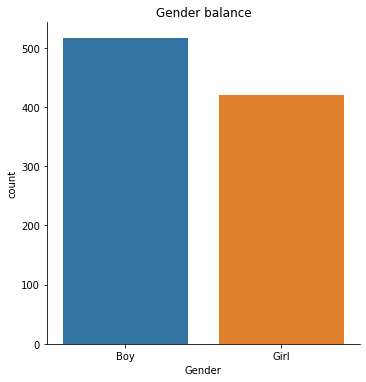

In [59]:
# Let's do quick visual analysis of the dataset to get an overview of potential patterns. Let's start by having a look at the gender distribution.


#sns.barplot(y="Age_Cat", x="Education Level", hue = "Age", data=data)
category_order=['Boy', 'Girl']
sns.catplot(x='Gender', data=data, kind='count', order=category_order).set(title='Gender balance');

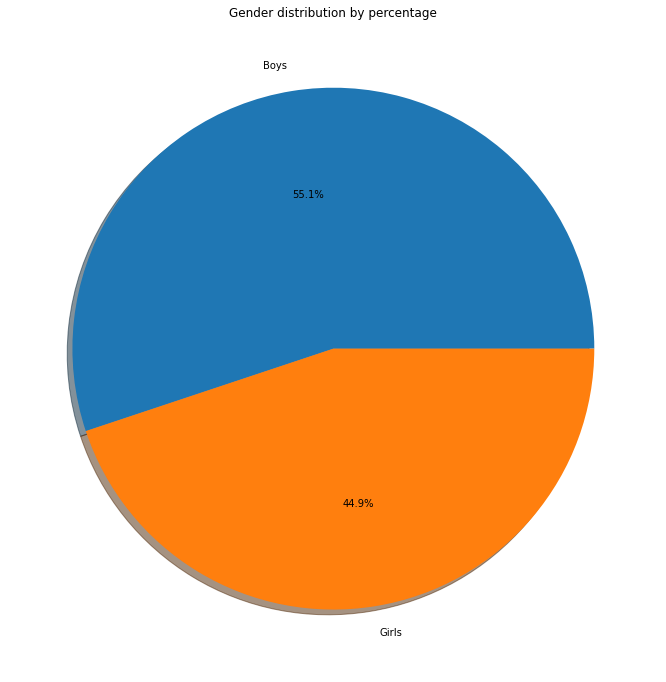

In [60]:
labels = 'Boys', 'Girls'
genders = data['Gender'].value_counts().sort_index() / data['Gender'].value_counts().sum() * 100

plt.figure(figsize=(20, 12))
plt.pie(genders, labels=labels, autopct='%1.1f%%', shadow=True, startangle=0)

plt.title('Gender distribution by percentage')
plt.show()

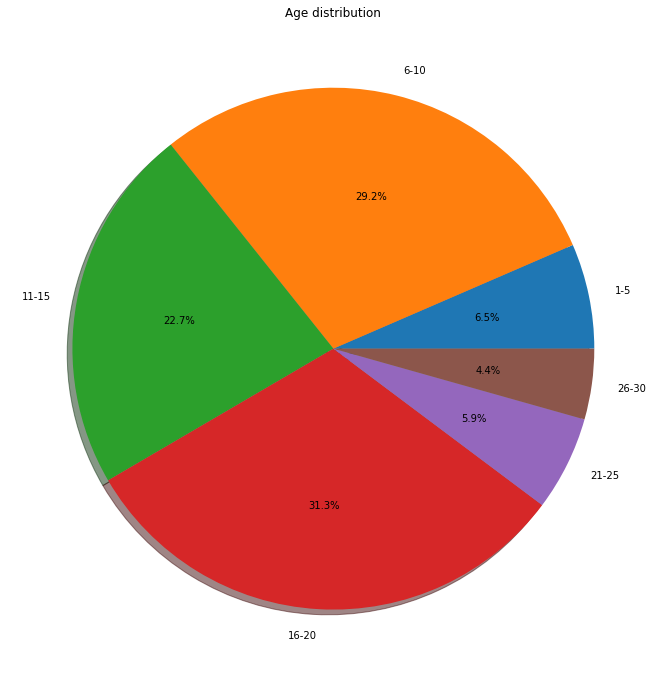

In [61]:
# Then, age
labels = '1-5', '6-10', '11-15', '16-20','21-25', '26-30'
ages = data['Age'].value_counts().sort_index() / data['Age'].value_counts().sum() * 100


plt.figure(figsize=(20, 12))
plt.pie(ages, labels=labels, autopct='%1.1f%%', shadow=True, startangle=0)

plt.title('Age distribution')
plt.show()


In [62]:
category_order=['1-5', '6-10', '11-15', '16-20', '21-25', '26-30']

#sns.catplot(x='Age', y='Adaptivity Level_Cat', hue='Gender' , data=data, kind='cound', order=category_order, ci=None);

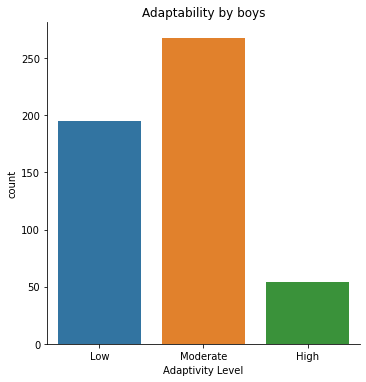

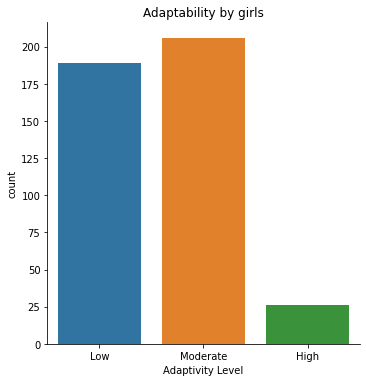

In [63]:
#sns.barplot(y="Age_Cat", x="Education Level", hue = "Age", data=data)
filter_list = ["Boy"]
filtered_data = data.loc[data['Gender'].isin(filter_list)]
category_order=['Low', 'Moderate', 'High']
sns.catplot(x='Adaptivity Level', data=filtered_data, kind='count', order=category_order).set(title='Adaptability by boys');

filter_list = ["Girl"]
filtered_data = data.loc[data['Gender'].isin(filter_list)]
category_order=['Low', 'Moderate', 'High']
sns.catplot(x='Adaptivity Level', data=filtered_data, kind='count', order=category_order).set(title='Adaptability by girls');


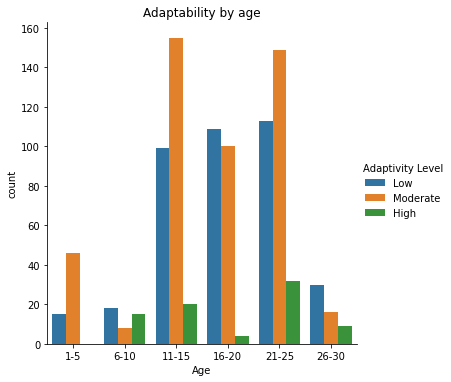

In [64]:
#sns.barplot(y="Age_Cat", x="Education Level", hue = "Age", data=data)
category_order=['1-5', '6-10', '11-15', '16-20', '21-25', '26-30']
hue_order=['Low', 'Moderate', 'High']
sns.catplot(x='Age', hue='Adaptivity Level', data=data, kind='count', order=category_order, hue_order=hue_order).set(title='Adaptability by age');
#sns.catplot(y='Adaptivity Level_Cat', x='Device', data=data, kind='bar', ci=None);

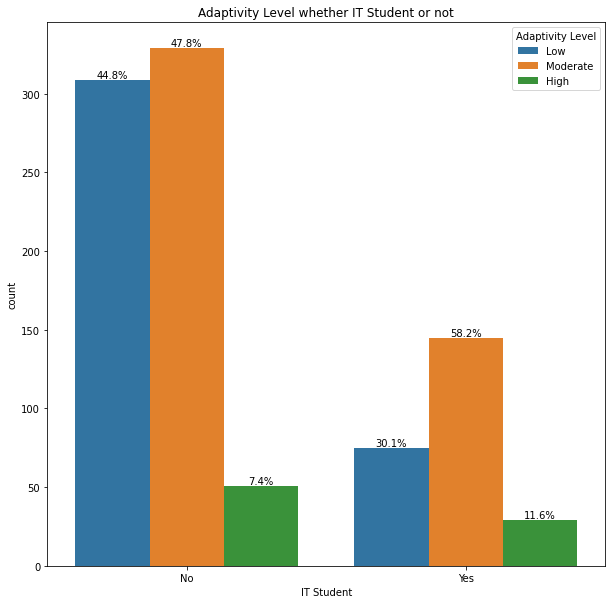

In [65]:
#Checking whether being an IT-student has any impact on their Adaptivity Level and showing the difference in percentages. 

feat = 'IT Student'
hue = 'Adaptivity Level'
hue_type = data[hue].dtype.type
hue_order=['Low', 'Moderate', 'High']

groups = data[feat].unique()
proportions = data.groupby(feat)[hue].value_counts(normalize=True)

plt.figure(figsize=(10,10))
ax = sns.countplot(x=feat, hue=hue, data=data, hue_order=hue_order)
ax.set_title("Adaptivity Level whether IT Student or not")

for c in ax.containers:
    labels = [f'{proportions.loc[g, hue_type(c.get_label())]:.1%}' for g in groups]
    ax.bar_label(c, labels)

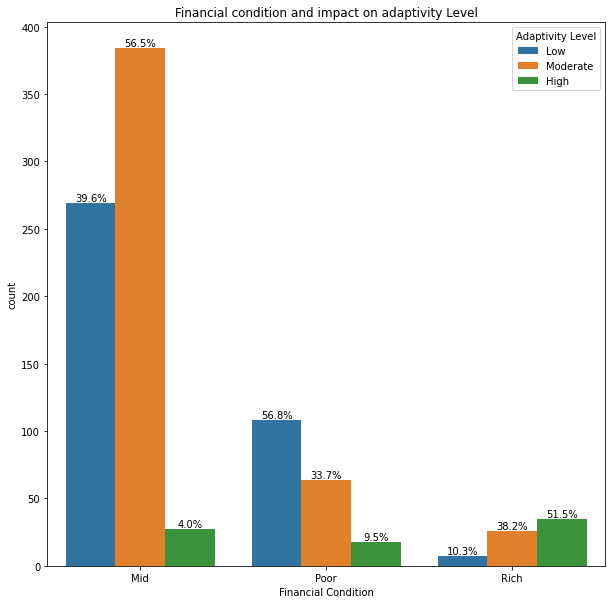

In [66]:
#Checking whether financial situation impact Adaptivity Level

feat = 'Financial Condition'
hue = 'Adaptivity Level'
hue_type = data[hue].dtype.type
hue_order=['Low', 'Moderate', 'High']

groups = data[feat].unique()
proportions = data.groupby(feat)[hue].value_counts(normalize=True)

plt.figure(figsize=(10,10))
ax = sns.countplot(x=feat, hue=hue, data=data, hue_order=hue_order)
ax.set_title("Financial condition and impact on adaptivity Level")

for c in ax.containers:
    labels = [f'{proportions.loc[g, hue_type(c.get_label())]:.1%}' for g in groups]
    
    ax.bar_label(c, labels)

In [67]:
#as we see, poor people do not adapt well, rich people adapt well, and 
#those in the middle do not adapt very well, but highest number on moderate
#adaptivity level. 

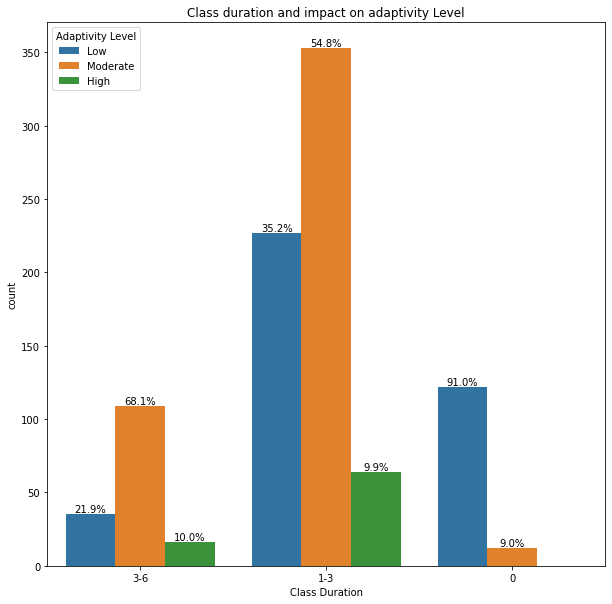

In [68]:
#Checking whether class duration impact Adaptivity Level

feat = 'Class Duration'
hue = 'Adaptivity Level'
hue_type = data[hue].dtype.type
hue_order=['Low', 'Moderate', 'High']

groups = data[feat].unique()
proportions = data.groupby(feat)[hue].value_counts(normalize=True)
#For category "0" we needed to give "High" value zero, to avoid empty value in the code:
proportions[('0', 'High')] = 0

plt.figure(figsize=(10,10))
ax = sns.countplot(x=feat, hue=hue, data=data, hue_order=hue_order)
ax.set_title("Class duration and impact on adaptivity Level")

for c in ax.containers:
    labels = [f'{proportions.loc[g, hue_type(c.get_label())]:.1%}' for g in groups]

    ax.bar_label(c, labels)


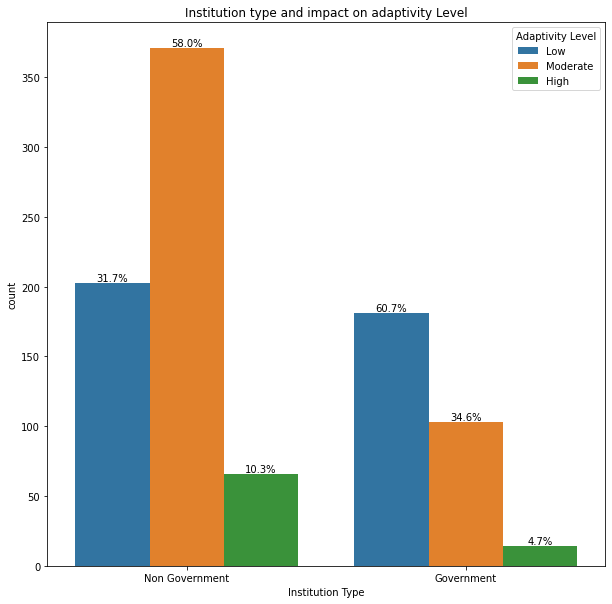

In [69]:
#Checking whether institution type impact Adaptivity Level

feat = 'Institution Type'
hue = 'Adaptivity Level'
hue_type = data[hue].dtype.type
hue_order=['Low', 'Moderate', 'High']

groups = data[feat].unique()
proportions = data.groupby(feat)[hue].value_counts(normalize=True)

plt.figure(figsize=(10,10))
ax = sns.countplot(x=feat, hue=hue, data=data, hue_order=hue_order)
ax.set_title("Institution type and impact on adaptivity Level")

for c in ax.containers:
    labels = [f'{proportions.loc[g, hue_type(c.get_label())]:.1%}' for g in groups]
    
    ax.bar_label(c, labels)
    
#Students at private institution adapt better than students at public institution. 

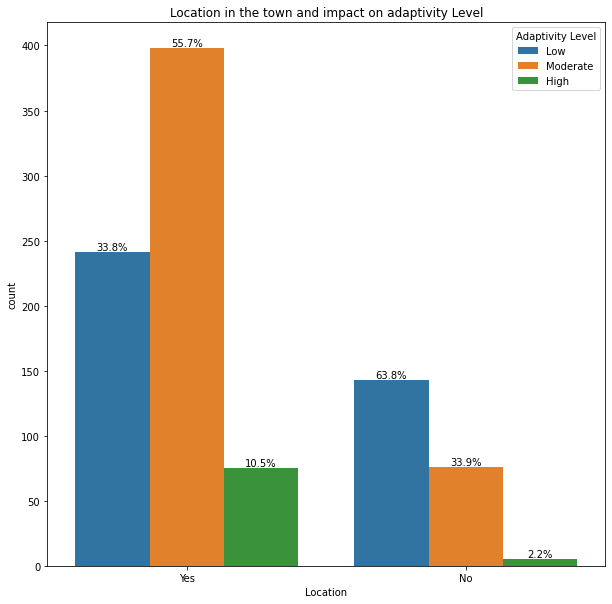

In [70]:
#Checking whether location in the town impact Adaptivity Level

feat = 'Location'
hue = 'Adaptivity Level'
hue_type = data[hue].dtype.type
hue_order=['Low', 'Moderate', 'High']

groups = data[feat].unique()
proportions = data.groupby(feat)[hue].value_counts(normalize=True)

plt.figure(figsize=(10,10))
ax = sns.countplot(x=feat, hue=hue, data=data, hue_order=hue_order)
ax.set_title("Location in the town and impact on adaptivity Level")

for c in ax.containers:
    labels = [f'{proportions.loc[g, hue_type(c.get_label())]:.1%}' for g in groups]
    
    ax.bar_label(c, labels)

#Students located in town (yes) seems to adapt better to online education. A majority of students located outside town adapt poorly.

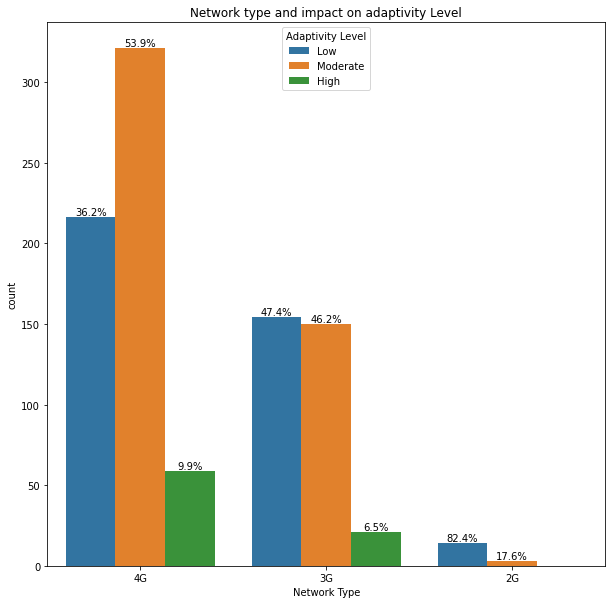

In [71]:
#Checking whether network type impact Adaptivity Level

feat = 'Network Type'
hue = 'Adaptivity Level'
hue_type = data[hue].dtype.type
hue_order=['Low', 'Moderate', 'High']

groups = data[feat].unique()
proportions = data.groupby(feat)[hue].value_counts(normalize=True)

#For category "2G" we needed to give "High" value zero, to avoid empty value in the code:
proportions[('2G', 'High')] = 0

plt.figure(figsize=(10,10))
ax = sns.countplot(x=feat, hue=hue, data=data, hue_order=hue_order)
ax.set_title("Network type and impact on adaptivity Level")

for c in ax.containers:
    labels = [f'{proportions.loc[g, hue_type(c.get_label())]:.1%}' for g in groups]
    
    ax.bar_label(c, labels)

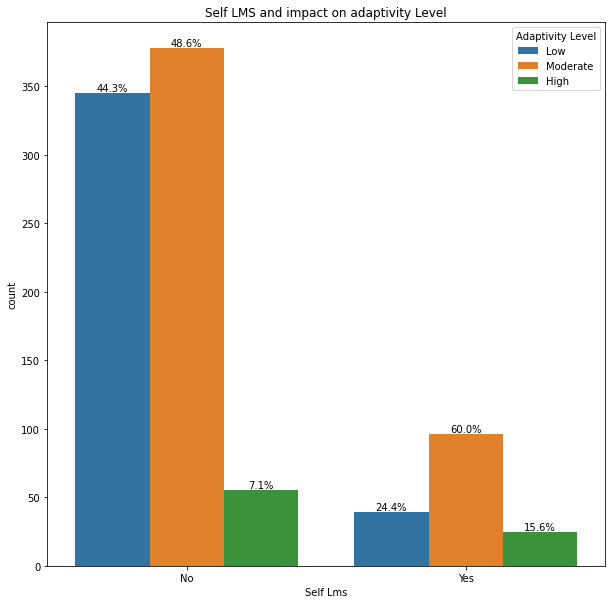

In [72]:
#Checking whether lms impact Adaptivity Level

feat = 'Self Lms'
hue = 'Adaptivity Level'
hue_type = data[hue].dtype.type
hue_order=['Low', 'Moderate', 'High']

groups = data[feat].unique()
proportions = data.groupby(feat)[hue].value_counts(normalize=True)

plt.figure(figsize=(10,10))
ax = sns.countplot(x=feat, hue=hue, data=data, hue_order=hue_order)
ax.set_title("Self LMS and impact on adaptivity Level")

for c in ax.containers:
    labels = [f'{proportions.loc[g, hue_type(c.get_label())]:.1%}' for g in groups]
    
    ax.bar_label(c, labels)

In [73]:
data.describe().T

,count,unique,top,freq
Gender,938,2,Boy,517
Age,938,6,21-25,294
Education Level,938,3,School,414
Institution Type,938,2,Non Government,640
IT Student,938,2,No,689
Location,938,2,Yes,714
Load-shedding,938,2,Low,779
Financial Condition,938,3,Mid,680
Internet Type,938,2,Mobile Data,537
Network Type,938,3,4G,596


# Section 4 - Conclude the project and the results

<Figure size 432x288 with 0 Axes>

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


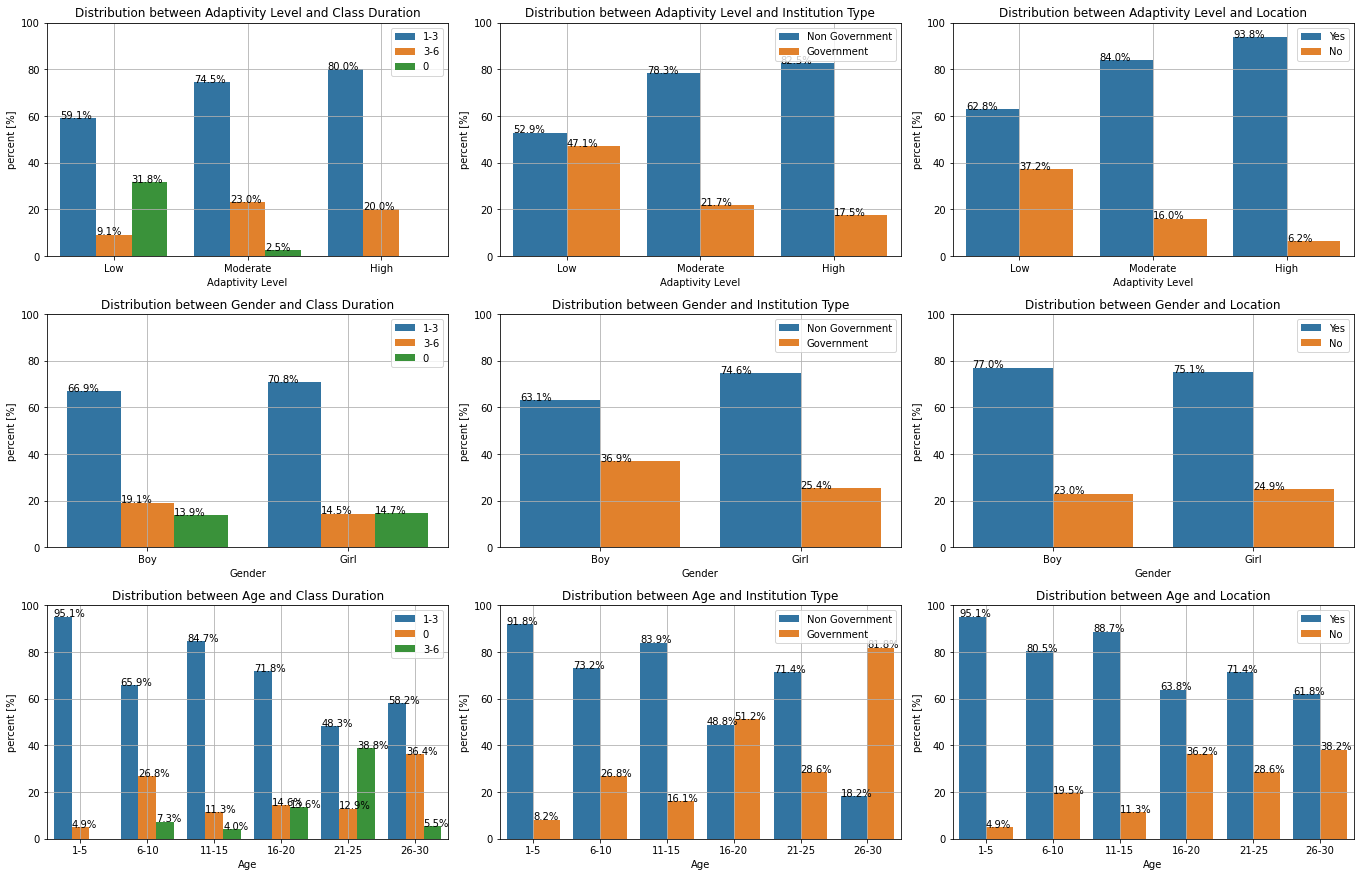

In [74]:
# ## Printing some Seaborn plots

# Creating a figure object for the subplots
fig = plt.figure()

# Making a list of combinations we want to plot
list_pairs = [['Adaptivity Level', 'Class Duration'],
            ['Adaptivity Level', 'Institution Type'],
            ['Adaptivity Level', 'Location'],
            ['Gender', 'Class Duration'],
            ['Gender', 'Institution Type'],
            ['Gender', 'Location'],
            ['Age', 'Class Duration'],
            ['Age', 'Institution Type'],
            ['Age', 'Location']
            ]

# Defining the amount of plots we want on each row
n_plot_columns = 3 # Change this for more/less subplots side-by-side
# The number of rows needed to plot all data in list_pairs
n_plot_rows = round(len(list_pairs) / n_plot_columns) + len(list_pairs) // n_plot_columns
# Defining the gridspec for placement of subplots in figure object
gs = fig.add_gridspec(n_plot_rows, n_plot_columns)

# Next we create a for-loop to define the subplots locations
scale_sp = 0.8 # For scaling the subplot sizes
j = 0
k = 1
list_ax = [] # List to store the subplot ax-data
fig = plt.figure(figsize=(int(8 * n_plot_columns * scale_sp), int(5 * n_plot_rows * scale_sp)))
for i in range(len(list_pairs)):
    if i % n_plot_columns == 0:
        j += 1
    ax = fig.add_subplot(gs[j-1, k-1])
    # print(int(str(j) + str(n_plot_columns) + str(k))) # <-- Used for debug and see that we get the right numbers.
    list_ax.append(ax)
    # print('i=%d, j=%d, n_plot_columns=%d, k=%d' % (i, j, n_plot_columns, k)) # <-- Used for debug and see that we get the right numbers.
    if k < n_plot_columns:
        k += 1
    else:
        k = 1

# Creating a for-loop to plot data into each subplot
counter = 0 # Counter used to get the corresponding subplot locations we created over from list_ax.
for pair in list_pairs:
    # Defining data-location in the nested list
    x_str = pair[0]
    y_str = pair[1]
    # Defining string 
    num = ' Numerical Value'
    title = 'Distribution between ' + x_str + ' and ' + y_str
    # Creating a new DataFrame with data we want to use for ploting
    plot_data = [data[x_str], data[y_str]]
    plot_headers = [x_str, y_str]
    plot_df = pd.concat(plot_data, axis=1, keys=plot_headers)
    # Checking if x-axis is int or not, then sorting ascending. Only for main x-tick, not for each bar on one tick.
    # if '-' in list(plot_df[x_str].unique())[0]:
    #     plot_order = sorted(plot_df[x_str].unique(), key=lambda x: int(x.split('-')[0]))
    # else:
    #     plot_order = sorted(plot_df[x_str].unique(), reverse=False)
    plot_order = sorted(plot_df[x_str].unique(), key=lambda x: dict_assigned_data[x_str][x])
    # print(plot_order)
    # Choosing current subplot-position
    ax = list_ax[counter]
    # Making countplot
    # sns.countplot(x=x_str, hue = y_str, data= plot_df, ax=ax, order=plot_order) # Comment this if sns.barplot is used instead.
    plot_df = plot_df.groupby(x_str)[y_str].value_counts(normalize=True).mul(100).rename('percent [%]').reset_index() # Comment this if sns.countplot is used instead. Otherwize uncomment this.
    sns.barplot(x=x_str, y='percent [%]', hue=y_str, data = plot_df, ax=ax, order=plot_order) # Comment this if sns.countplot is used instead. Otherwize uncomment this.
    ax.set_ylim(0, 100) # Comment this if sns.countplot is used instead. Otherwize uncomment this.
    # Placing percentage on top of bars
    for p in ax.patches: # Comment this for-loop if sns.countplot is used instead. Otherwize uncomment this.
        bar_txt = str(p.get_height().round(1)) + '%'
        bar_txt_x = p.get_x() 
        bar_txt_y = p.get_height()
        ax.text(bar_txt_x, bar_txt_y, bar_txt)
    ax.set_title(title)
    ax.legend(loc=1)
    plt.tight_layout()
    # Add gridlines to subplots
    ax.grid()
    counter += 1

In [75]:
# Regression analysis to find which independent variable affects most the outcome of the dependent variable

X = data_num[['Gender', 'Age', 'Education Level', 'Institution Type', 'IT Student',
'Location', 'Load-shedding', 'Financial Condition', 'Internet Type',
'Network Type', 'Class Duration', 'Self Lms', 'Device',]] 
y = data_num['Adaptivity Level']

from sklearn.linear_model import LinearRegression  
reg = LinearRegression()  
reg.fit(X, y)

attributes_coefficients = pd.DataFrame(reg.coef_, X.columns, columns=['Coefficient'])  
attributes_coefficients


#resultatet tolkes slik --> øker vi EN enhet av den uavhengig variabel så endrer avhengig variavel den verdien som kommer i tabellen.
#For å komme med brukbar resultat så må vi endre avhengig variabel. slik det er nå ['High', 'Low', 'Moderate'] tilsvarer verdier [0, 1, 2]. gir ikke mening. Det burde endres til Low moderate high --> 0 , 1 , 2 . prøvde å bruke metode replace lokalt men klarte ikke :( ) 

,Coefficient
Gender,-0.035709
Age,0.001166
Education Level,-0.098378
Institution Type,0.125170
IT Student,0.088769
Location,0.097239
Load-shedding,-0.081544
Financial Condition,0.171664
Internet Type,-0.199671
Network Type,0.205139


As initially stated, our goal with this assignment was to use the new skills we learned related to the transformation and visualization of data in a way that we could get better insights and information about chosen data.

Since the original dataset was structured and ready to be used, we were forced to add some random wrong failures as well as missing data.

The chosen dataset was relevant for all group members. We were interested in finding out more about the factors that can influence students' adaptability to online education.

Since we changed the original dataset in various ways, we felt the need to test the confidence level of the data. For that reason, after cleaning the data we checked the relation between age and education level. We expected that kids (age 1 to 15) are at the school level. Teenagers (age 16 to 20) are expected to be in all the three different levels analyzed. Older students (age 21 to 25), on the other hand, should be graduating from college or university. The last analyzed group (age 26-30) should just involve education at the university level. Our findings were according to our expectations. We assumed we could go further exploring our data.

To study the correlations of our variables, we used a heatmap. Since the original variables were categorical, we transformed these variables into dummy variables. The heatmap shows the correlations each independent variable has on the dependent variable on its own. How big a Pearson correlation should be to be considered strong, is subjective and depends on the field of study.

After seeing the results, we considered that none of the independent variables shows a strong correlation to adaptability to online education. The three most correlated independent variables to student adaptability to online education are Class_Duration (Pearson's r=0.38), Institution_type (r=0.27) and location (r=0.26). This means that, according to this study, the longer the duration of the class the higher the students' adaptability to online education. 

However, we emphasize the importance of visualizations. According to the shown diagram, this relation is polynomial. It means that the positive correlation inverts after a certain amount of class length. Concerning institution type, it seems that Private schools do a better job facilitating students' adaptation to online education. The third strongest factor was the location. It seems that students living in urban areas adapt better to online education. As a curiosity, we found out that girls adapt worse than boys, although the correlation is very weak (r= -0.083).

When we break down how financial conditions influence adaptivity, we discover that poor people do not adapt well, while rich people adapt well, and those in the middle do not adapt very well, but better than poor people. To get a better understanding of why students with low and medium financial conditions do it worse than people with better financial conditions, a possible approach could be to make an in-depth study on the learning environment at home for the different groups.

Since correlation measures just the linear association between two variables, we felt the need to use linear regression to understand how changing values of the independent variable affect the dependent variable.

To study the correlations of our variables we used a heatmap. Since the original variables were categorical, we transformed these variables to dummy variables. The heatmap shows the correlations each independent variable has on the dependent variable by his own. How big Pearson correlation should be to be considered strong is subjective and depend on the field of study. Anyway we, after seeing the results, considered that none of the independent variables show strong correlation to adaptability to online education. The tree most correlated independent variables to student adaptability to online education are Class_Duration (Pearson's r = 0,38), Institution_type (r=0,27) and location (r=0,26). This means that, according to this study, the longer the duration of the class the higher the student’s adaptability to online education. However, we emphasize the importance of visualizations! According to the showed diagram is this relation polynomial. It means that the positive correlation inverts after a certain amount of class length. Concerning institution type, it seems that Private schools do a better job facilitating students’ adaption to online education. The third strongest factor was location. It seems that students living in urban areas adapt better to online education. As a curiosity we found out that girls adapt worse than boys, although the correlation is very weak (r= -0,083).

When we break down how financial condition influence adaptivity we discovered that poor people do not adapt well, while rich people adapt well, and those in the middle do not adapt very well, but better than poor people. To get a better understanding of why students with low and medium financial condition it worse than people with better financial conditions, a possible approach could be to make an in deep study on the learning environment at home for the different groups.

Since correlation measures just the linear association between two variables, we felt the need to use linear regression to understand how changing values of the independent variable affects the dependent variable.

We were aware of the pitfalls of using linear regression on categorical/dummy variables. Since we needed to transform all the variables into dummy variables, we needed to have a clear idea about what each number should represent, and how the interactions were supposed to be. We really want to avoid infusing information that could influence the interpretation of the results. Adaptability to web education was most influenced by Class Duration, Network type and Self LMS. Again, we emphasize that linear regression is not a tool to study variables that are not linear, as is the case of Class Duration. In that sense, our linear regression is not completely accurate. We shouldn't have taken the independent variables that are not linear. In these cases, we should have used polynomial regression. 

Since these variables are categorical we can not interpret the regression coefficient value in the same way we do on continuous variables. In our case, the regression coefficient shows the average difference in Y (students' adaptability to web education) between the category for which network type/self LMS is 0 and the same categories when they are 1 or n.

With that considered, we did some diagrams to get more insights into the relation of these variables to our dependent variable.

Finally, we can conclude that taking all variables into account, we see that some variables relate in a nonlinear way to our independent variable. This requires another type of analysis that we choose to not perform. Because of that, we can not infer any conclusions on the relation between class duration and students' adaptability to web education. On the other hand, we can infer that students' network type, financial condition and type of institution learning management systems seem to influence the overall outcome of students' adaptability to online education.
